## **Portfolio optimization based on stocks cluster analysis**

This project is an experiment to see whether financial ratios in different dimensions really add value to stock selection and see how cluster analysis helps us to get rid of the sea of financial metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
from ipywidgets import widgets, interactive
import warnings
from os import listdir
from os.path import isfile, join
from yellowbrick.cluster import KElbowVisualizer
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
# mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
my_colors = ['teal','firebrick','burlywood','royalblue','mediumpurple','goldenrod','darkgray','palevioletred']
sns.set_palette(sns.color_palette(my_colors))

In [2]:
#Load dataset
df_2015 = pd.ExcelFile('data/FinancialIndicator_Return_Volatility.xlsx').parse('2015')
df_2016 = pd.ExcelFile('data/FinancialIndicator_Return_Volatility.xlsx').parse('2016')
df_2017 = pd.ExcelFile('data/FinancialIndicator_Return_Volatility.xlsx').parse('2017')
df_2018 = pd.ExcelFile('data/FinancialIndicator_Return_Volatility.xlsx').parse('2018')
df_2019 = pd.ExcelFile('data/FinancialIndicator_Return_Volatility.xlsx').parse('2019')
df_2020 = pd.ExcelFile('data/FinancialIndicator_Return_Volatility.xlsx').parse('2020')
df_2021 = pd.ExcelFile('data/FinancialIndicator_Return_Volatility.xlsx').parse('2021')

The cluster method is a distance-based algorithm, so it is very sensitive to outliers and need to be scaled before fitting to the model.

#### Remove outliers

In [3]:
def outliers_removing(df):
    exclude_df = df.copy()
    for col in exclude_df.columns[1:]:
        mean_col = exclude_df[col].mean()
        std_col = exclude_df[col].std()
        left_bound = mean_col - 3*std_col
        right_bound = mean_col + 3*std_col
        exclude_df = exclude_df[(exclude_df[col]>=left_bound) & (exclude_df[col]<=right_bound)]
    
    return exclude_df

In [4]:
#Remove outliers of all years dataset
df_2015 = outliers_removing(df_2015).reset_index(drop=True)
df_2016 = outliers_removing(df_2016).reset_index(drop=True)
df_2017 = outliers_removing(df_2017).reset_index(drop=True)
df_2018 = outliers_removing(df_2018).reset_index(drop=True)
df_2019 = outliers_removing(df_2019).reset_index(drop=True)
df_2020 = outliers_removing(df_2020).reset_index(drop=True)
df_2021 = outliers_removing(df_2021).reset_index(drop=True)

In [5]:
#Get the intersection companies among years
d = [list(df_2015['Company'].values),list(df_2016['Company'].values),list(df_2017['Company'].values),\
    list(df_2018['Company'].values),list(df_2019['Company'].values),list(df_2020['Company'].values),list(df_2021['Company'].values)]
comp_list = list(set.intersection(*map(set,d)))
#The total number of companies to use
len(comp_list)

157

In [6]:
#Homogenize the number of companies between years
df_2015 = df_2015[df_2015['Company'].isin(comp_list)].reset_index(drop=True)
df_2016 = df_2016[df_2016['Company'].isin(comp_list)].reset_index(drop=True)
df_2017 = df_2017[df_2017['Company'].isin(comp_list)].reset_index(drop=True)
df_2018 = df_2018[df_2018['Company'].isin(comp_list)].reset_index(drop=True)
df_2019 = df_2019[df_2019['Company'].isin(comp_list)].reset_index(drop=True)
df_2020 = df_2020[df_2020['Company'].isin(comp_list)].reset_index(drop=True)
df_2021 = df_2021[df_2021['Company'].isin(comp_list)].reset_index(drop=True)

#### Standard scaler dataset

In [7]:
from sklearn.preprocessing import StandardScaler

def standard_scaler(df):
    df.replace(np.inf,0,inplace=True)
    scaler = StandardScaler()
    df_scale = df.copy()
    df_scale.drop(['Company','Return','Volatility'],axis=1,inplace=True)
    for col in df_scale.columns:
        df_scale[col] = scaler.fit_transform(df_scale[[col]])
    
    return df_scale

df_2015_scale = standard_scaler(df_2015)
df_2016_scale = standard_scaler(df_2016)
df_2017_scale = standard_scaler(df_2017)
df_2018_scale = standard_scaler(df_2018)
df_2019_scale = standard_scaler(df_2019)
df_2020_scale = standard_scaler(df_2020)
df_2021_scale = standard_scaler(df_2021)

The algorithm is used in this project is K-Means. This clustering method helps us to group similar stocks together based on their characteristics, represented by financial indicators.

#### Find the optimal number of K clusters

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [9]:
#Create a function to estimate the optimal number of k cluster for dataset of each year
def optimal_k(data,max_k=50):
    kmeans = KMeans(random_state=3107)
    visualizer = KElbowVisualizer(kmeans, k=(1,max_k))
    visualizer.fit(data)
    
    return visualizer.show()

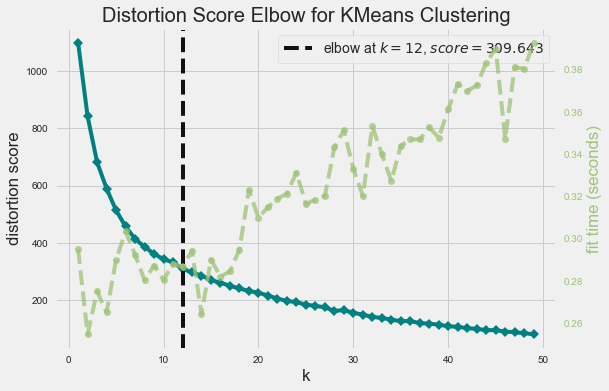

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
#Year 2015
optimal_k(df_2015_scale)

- The optimal k cluster for year 2015 is 12. 

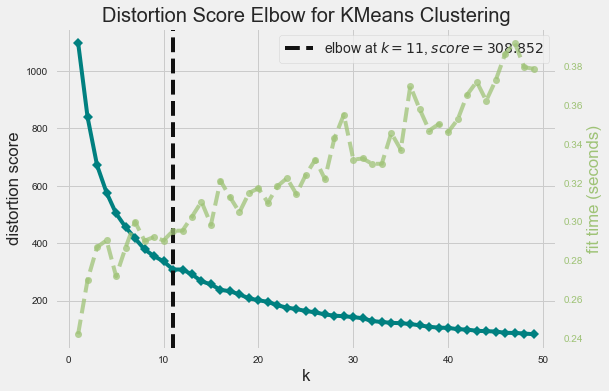

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
#Year 2016
optimal_k(df_2016_scale)

- The optimal k cluster for year 2016 is 11. 

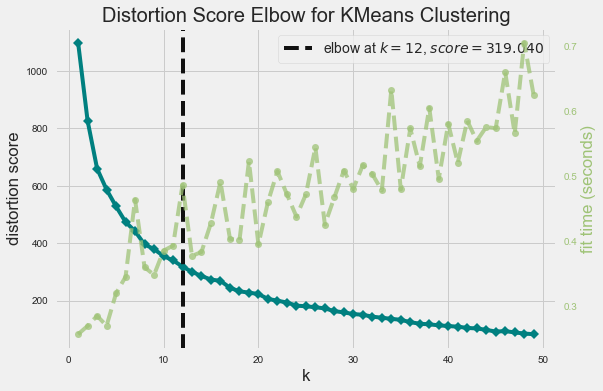

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
#Year 2017
optimal_k(df_2017_scale)

- The optimal k cluster for year 2017 is 12. 

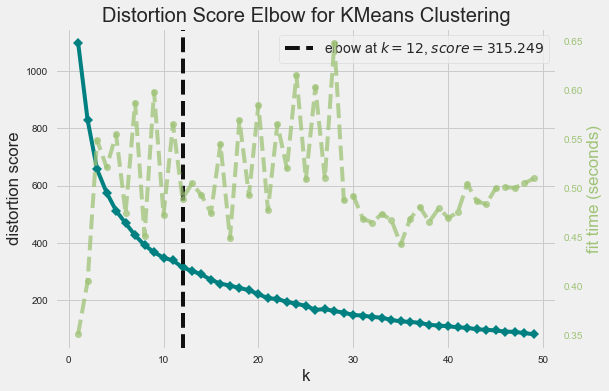

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
#Year 2018
optimal_k(df_2018_scale)

- The optimal k cluster for year 2018 is 12. 

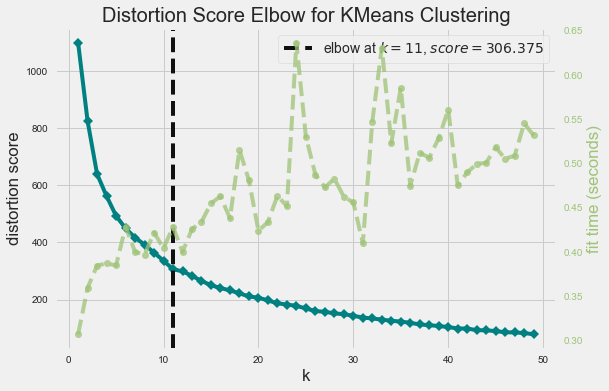

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
#Year 2019
optimal_k(df_2019_scale)

- The optimal k cluster for year 2019 is 11. 

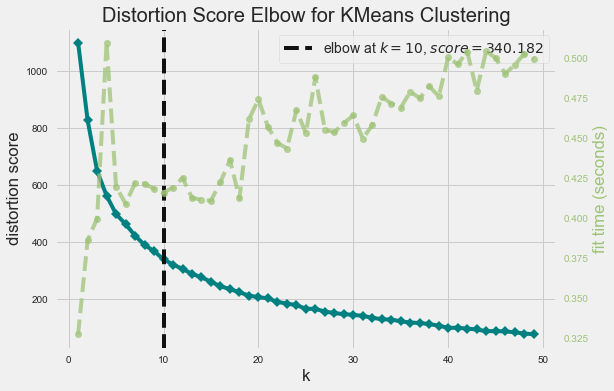

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
#Year 2020
optimal_k(df_2020_scale)

- The optimal k cluster for year 2020 is 10. 

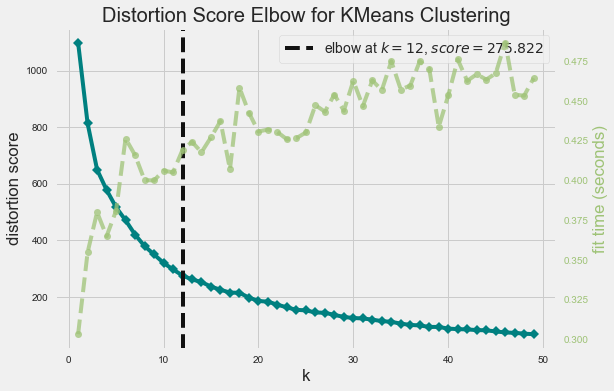

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
#Year 2021
optimal_k(df_2021_scale)

- The optimal k cluster for year 2021 is 12. 

#### Perform K-Means model with selected K for each year

In [17]:
#Create a function to fit K-Means model to the data of each year
def kmeans_model(data,k):
    model = KMeans(n_clusters=k,random_state=3107)
    labels = model.fit_predict(data)
    return labels

In [18]:
#Year 2015
df_2015['Cluster 2015'] = kmeans_model(df_2015_scale,k=12)
df_2015_scale['Cluster 2015'] = kmeans_model(df_2015_scale,k=12)

In [19]:
#Year 2016
df_2016['Cluster 2016'] = kmeans_model(df_2016_scale,k=11)
df_2016_scale['Cluster 2016'] = kmeans_model(df_2016_scale,k=11)

In [20]:
#Year 2017
df_2017['Cluster 2017'] = kmeans_model(df_2017_scale,k=12)
df_2017_scale['Cluster 2017'] = kmeans_model(df_2017_scale,k=12)

In [21]:
#Year 2018
df_2018['Cluster 2018'] = kmeans_model(df_2018_scale,k=12)
df_2018_scale['Cluster 2018'] = kmeans_model(df_2018_scale,k=12)

In [22]:
#Year 2019
df_2019['Cluster 2019'] = kmeans_model(df_2019_scale,k=11)
df_2019_scale['Cluster 2019'] = kmeans_model(df_2019_scale,k=11)

In [23]:
#Year 2020
df_2020['Cluster 2020'] = kmeans_model(df_2020_scale,k=10)
df_2020_scale['Cluster 2020'] = kmeans_model(df_2020_scale,k=10)

In [24]:
#Year 2021
df_2021['Cluster 2021'] = kmeans_model(df_2021_scale,k=12)
df_2021_scale['Cluster 2021'] = kmeans_model(df_2021_scale,k=12)

#### Visualization the cluster and the characteristics of the clusters

In [25]:
def cluster_visualization(data):
    #Characteristics
    characteristics_df = data.groupby(data.columns[-1]).mean().T
    characteristics_df.plot(figsize=(20,12))
    plt.legend(title='Cluster',ncol=len(characteristics_df.columns))
    plt.title('Characteristics of the clusters')
    plt.show()

    #Cluster PCA
    cluster_df = data.copy()
    cluster_df[data.columns[-1]] = cluster_df[data.columns[-1]].astype('category')
    pca = PCA(n_components=2)
    pca_features = pd.DataFrame(pca.fit_transform(cluster_df.drop([data.columns[-1]],axis=1)))
    cluster_df = pd.merge(cluster_df,pca_features,left_index=True,right_index=True)
    plt.figure(figsize=(20,12))
    sns.scatterplot(x=0,y=1,data=cluster_df,hue=data.columns[-1])
    plt.title('Cluster by PCA')
    plt.show()

    return characteristics_df

In this experiment, I have chosen the followings financial indicators to capture a company’s performance or ability from different dimensions:
- Debt to Equity ratio — leverage ratio of a company
- Dividend Yield — amount of money a company pays shareholders for owning a share of its stock divided by its current stock price
- Enterprise Value (EV) / EBITDA — a commonly used multiple to determine the value of a company
- Net Debt To EBITDA ratio — indicates company’s ability to decrease its debt
- Net Profit Margin — how much net income is generated as a percentage of revenue
- Operating Profit Margin — how much profit a company makes on a dollar of sales, after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax
- Return on Assets — indicates how well a company utilizes its assets, by determining how profitable a company is relative to its total assets

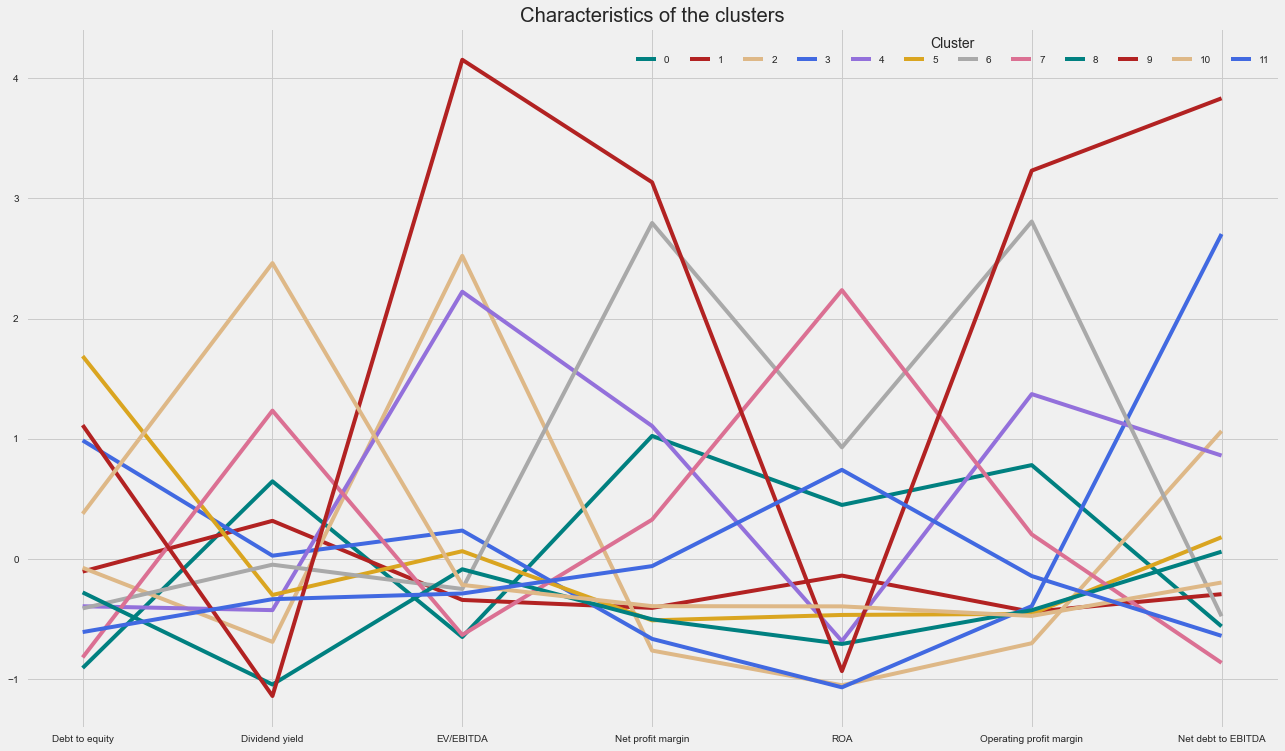

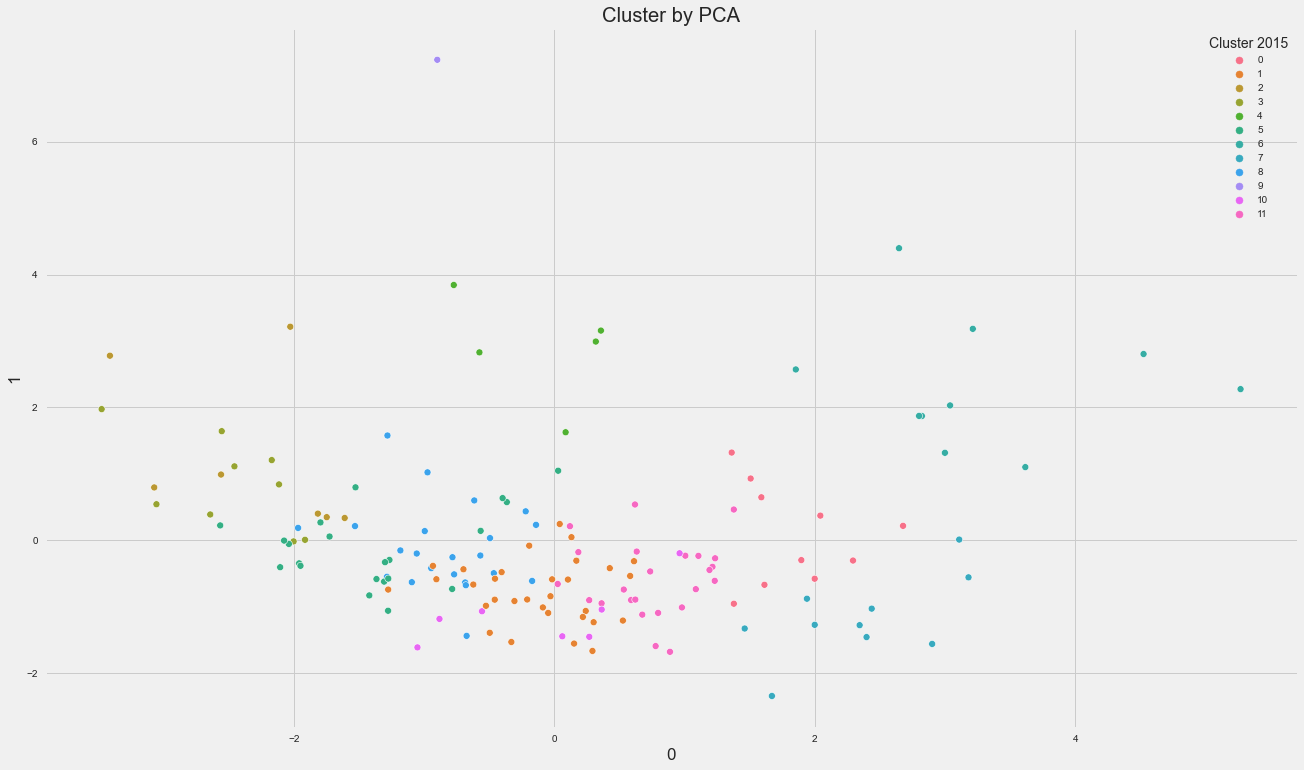

Cluster 2015,0,1,2,3,4,5,6,7,8,9,10,11
Debt to equity,-0.909064,-0.106377,-0.074668,0.985335,-0.395121,1.687053,-0.412965,-0.821552,-0.279902,1.112514,0.374644,-0.610062
Dividend yield,0.644728,0.315831,-0.691689,0.025739,-0.427408,-0.301275,-0.049007,1.233352,-1.046610,-1.142166,2.461654,-0.336312
EV/EBITDA,-0.651131,-0.342751,2.521579,0.234888,2.223095,0.063271,-0.251164,-0.633723,-0.087322,4.153926,-0.217576,-0.288899
Net profit margin,1.022684,-0.408824,-0.764162,-0.666914,1.105027,-0.512604,2.795500,0.325946,-0.504024,3.133939,-0.394302,-0.060923
ROA,0.448065,-0.139971,-1.052921,-1.070139,-0.685300,-0.467510,0.927697,2.236426,-0.708999,-0.935150,-0.396141,0.740385
Operating profit margin,0.779834,-0.441863,-0.703068,-0.393895,1.370893,-0.458571,2.807531,0.203135,-0.428169,3.231201,-0.475771,-0.143595
Net debt to EBITDA,-0.562712,-0.294440,1.063559,2.703468,0.859322,0.179427,-0.478343,-0.866254,0.059288,3.833132,-0.197534,-0.641446


In [26]:
#Year 2015
cluster_visualization(df_2015_scale)

- From the line graph, we can see that there are three clusters with very unique characteristics in 2015:
    - Cluster 9 - high net debt to EBITDA ratio and EV/EBITDA ratio
    - Cluster 10 - high dividend yied
    - Cluster 6 - high net profit margin

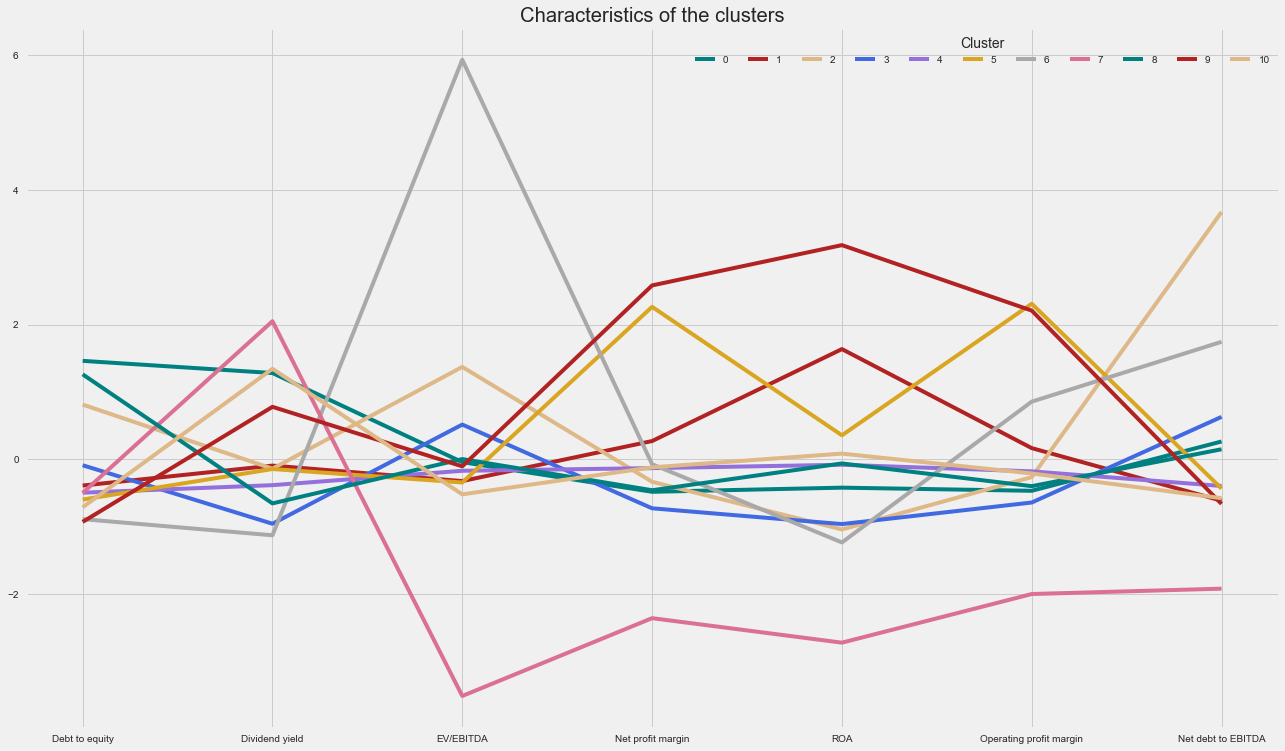

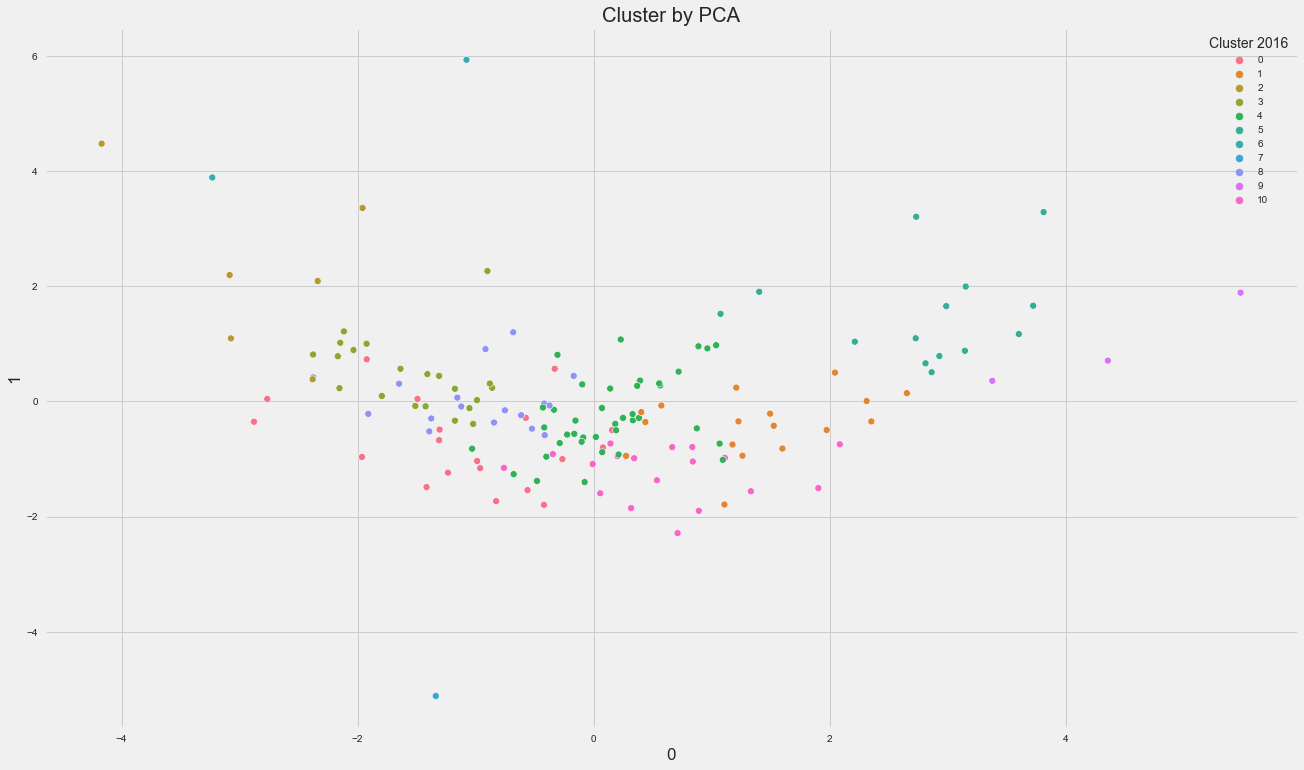

Cluster 2016,0,1,2,3,4,5,6,7,8,9,10
Debt to equity,1.461420,-0.389796,0.812613,-0.088179,-0.495885,-0.597974,-0.888361,-0.499397,1.261452,-0.929792,-0.712911
Dividend yield,1.280653,-0.093765,-0.139469,-0.956809,-0.383973,-0.144514,-1.128350,2.050196,-0.654684,0.778777,1.343852
EV/EBITDA,-0.042584,-0.323543,1.371468,0.515599,-0.170448,-0.344560,5.931420,-3.514075,0.003186,-0.104703,-0.520255
Net profit margin,-0.482596,0.270868,-0.333737,-0.727632,-0.131191,2.263194,-0.073250,-2.358725,-0.459476,2.581356,-0.119376
ROA,-0.421149,1.636165,-1.041263,-0.961891,-0.081145,0.356044,-1.234291,-2.722384,-0.061870,3.179582,0.084353
Operating profit margin,-0.467510,0.165989,-0.264662,-0.641678,-0.179014,2.309563,0.855692,-2.000345,-0.398917,2.207883,-0.210074
Net debt to EBITDA,0.264246,-0.614998,3.671751,0.629766,-0.396264,-0.434624,1.744202,-1.920589,0.148799,-0.662177,-0.577396


In [27]:
#Year 2016
cluster_visualization(df_2016_scale)

- From the line graph, we can see that there are four clusters with very unique characteristics in 2016:
    - Cluster 6 - high EV/EBITDA ratio
    - Cluster 7 - low and negative EV/EBITDA ratio, net profit margin, ROA, Operating profit margin, and net debt to EBITDA
    - Cluster 2 - high net debt to EBITDA
    - Cluster 9 - high ROA

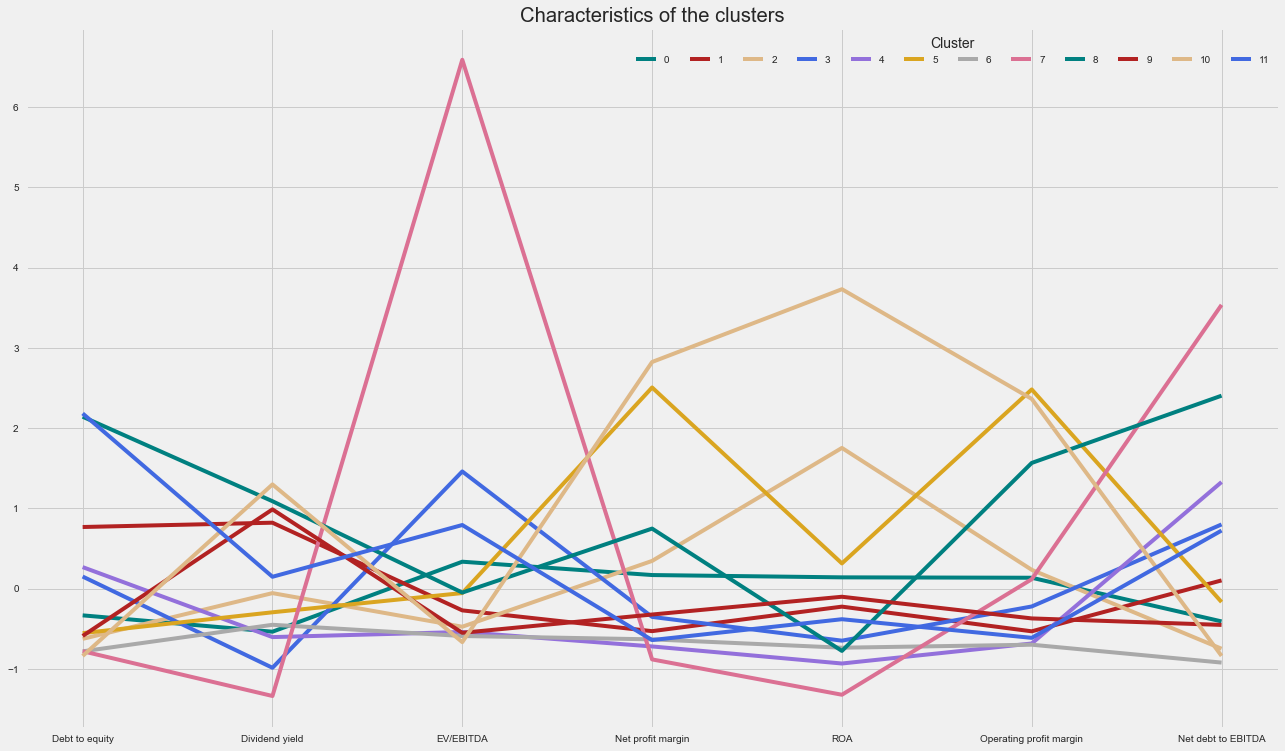

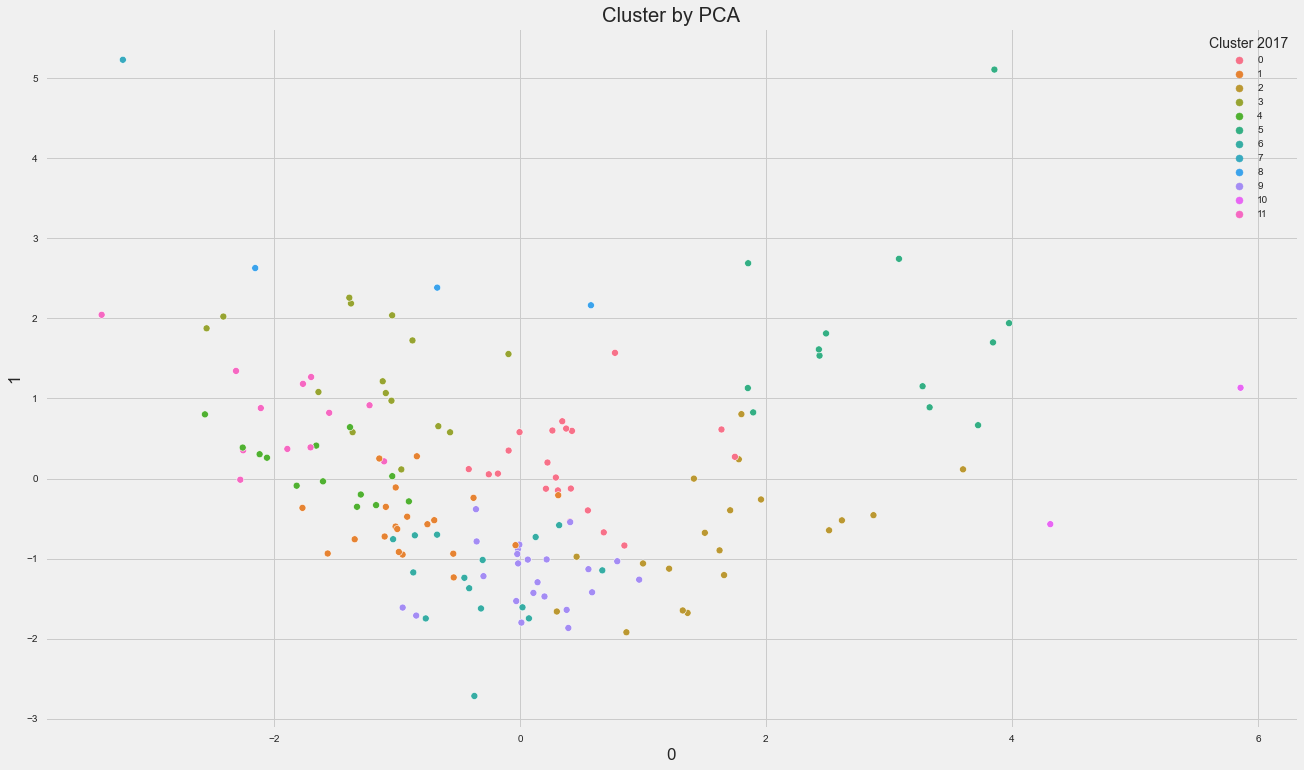

Cluster 2017,0,1,2,3,4,5,6,7,8,9,10,11
Debt to equity,-0.332200,0.768670,-0.625347,0.151402,0.269032,-0.553793,-0.780628,-0.779077,2.142980,-0.589226,-0.838485,2.183666
Dividend yield,-0.535897,0.822327,-0.055132,-0.985450,-0.603035,-0.294014,-0.449812,-1.336962,1.090146,0.988259,1.299380,0.148596
EV/EBITDA,0.336281,-0.270215,-0.473832,1.460885,-0.539435,-0.054399,-0.589508,6.590812,-0.048390,-0.549663,-0.665814,0.793552
Net profit margin,0.170094,-0.528905,0.346137,-0.351637,-0.719543,2.507232,-0.631222,-0.881242,0.748976,-0.321810,2.824917,-0.640119
ROA,0.141326,-0.223551,1.753970,-0.647436,-0.932175,0.314996,-0.735315,-1.321295,-0.775439,-0.100402,3.731725,-0.380354
Operating profit margin,0.136488,-0.531048,0.235087,-0.221560,-0.682883,2.482746,-0.697875,0.118006,1.567130,-0.370365,2.364922,-0.612455
Net debt to EBITDA,-0.407646,0.103289,-0.747976,0.800574,1.328979,-0.166476,-0.920678,3.536750,2.405047,-0.451221,-0.837484,0.724708


In [28]:
#Year 2017
cluster_visualization(df_2017_scale)

- From the line graph, we can see that there are two clusters with very unique characteristics in 2017:
    - Cluster 7 - high net debt to EBITDA ratio and EV/EBITDA ratio
    - Cluster 10 - high ROA

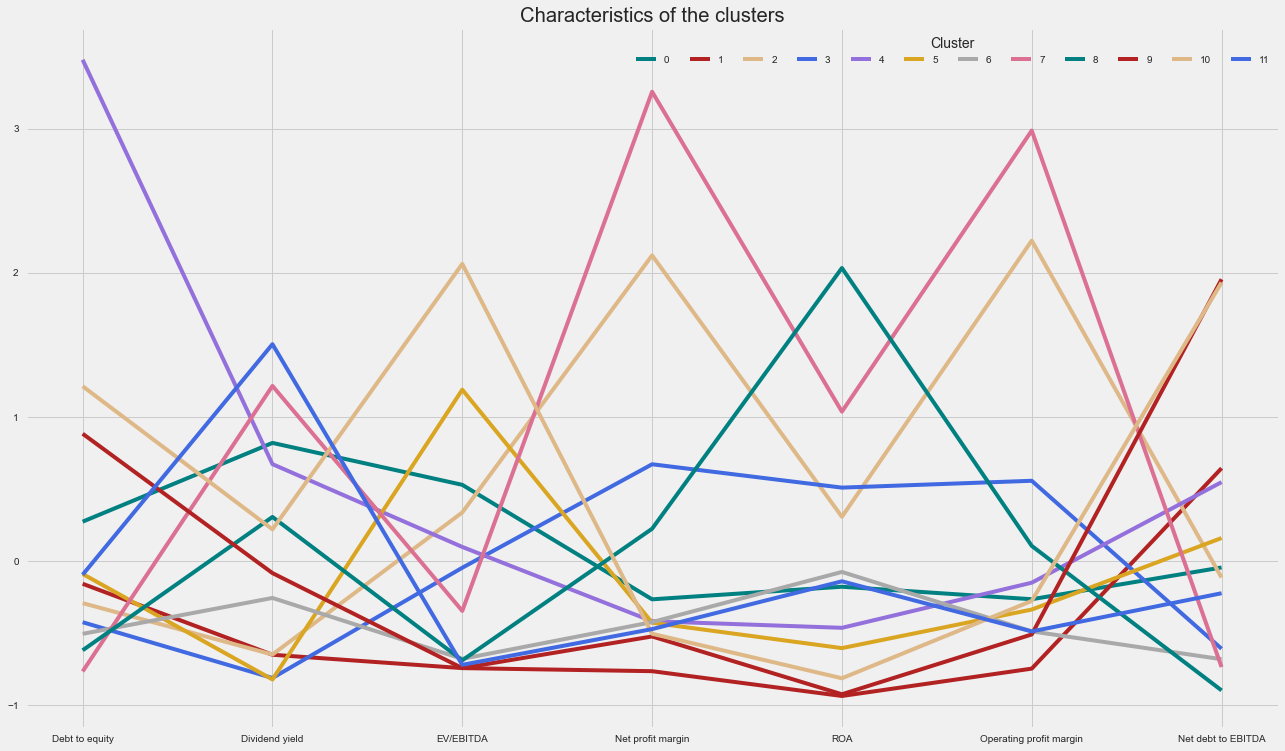

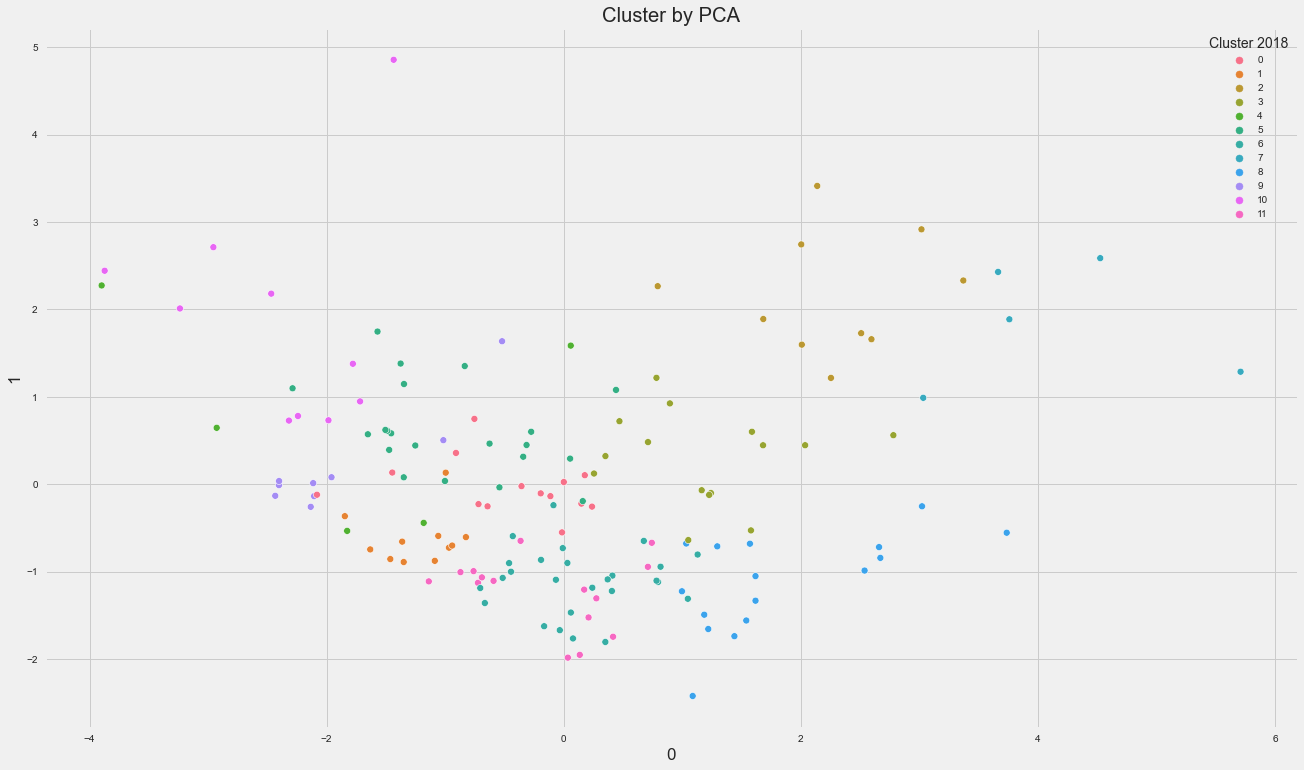

Cluster 2018,0,1,2,3,4,5,6,7,8,9,10,11
Debt to equity,0.272675,-0.158361,-0.292717,-0.425117,3.477913,-0.090216,-0.505728,-0.766712,-0.619974,0.882921,1.212377,-0.095639
Dividend yield,0.819155,-0.650958,-0.649313,-0.812189,0.671791,-0.822530,-0.256741,1.214710,0.305320,-0.084275,0.219358,1.504267
EV/EBITDA,0.528222,-0.743660,0.336682,-0.047116,0.097202,1.188534,-0.679470,-0.346487,-0.689509,-0.743660,2.061600,-0.720828
Net profit margin,-0.266289,-0.764927,2.120549,0.670954,-0.418084,-0.428614,-0.424273,3.256202,0.223504,-0.523978,-0.505394,-0.472830
ROA,-0.178956,-0.937095,0.306473,0.508855,-0.464057,-0.604862,-0.076245,1.036157,2.032816,-0.925064,-0.814107,-0.141237
Operating profit margin,-0.265628,-0.747248,2.222906,0.556329,-0.150870,-0.337240,-0.488547,2.986588,0.104507,-0.510090,-0.277541,-0.489047
Net debt to EBITDA,-0.045430,0.643452,-0.115051,-0.609173,0.546803,0.159029,-0.681964,-0.735991,-0.898178,1.954855,1.932208,-0.224091


In [29]:
#Year 2018
cluster_visualization(df_2018_scale)

- From the line graph, we can see that there are three clusters with very unique characteristics in 2018:
    - Cluster 4 - high debt to equity 
    - Cluster 7 - high net profit margin and operating profit margin
    - Cluster 8 - high ROA

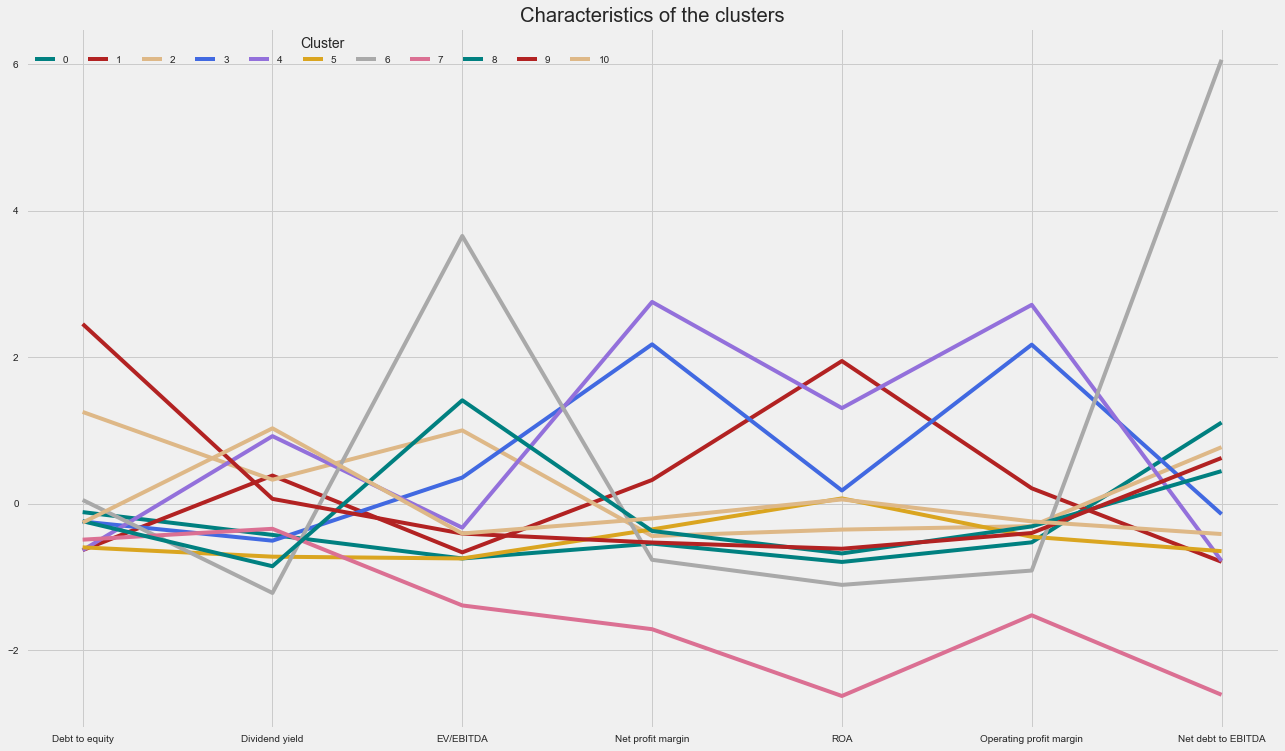

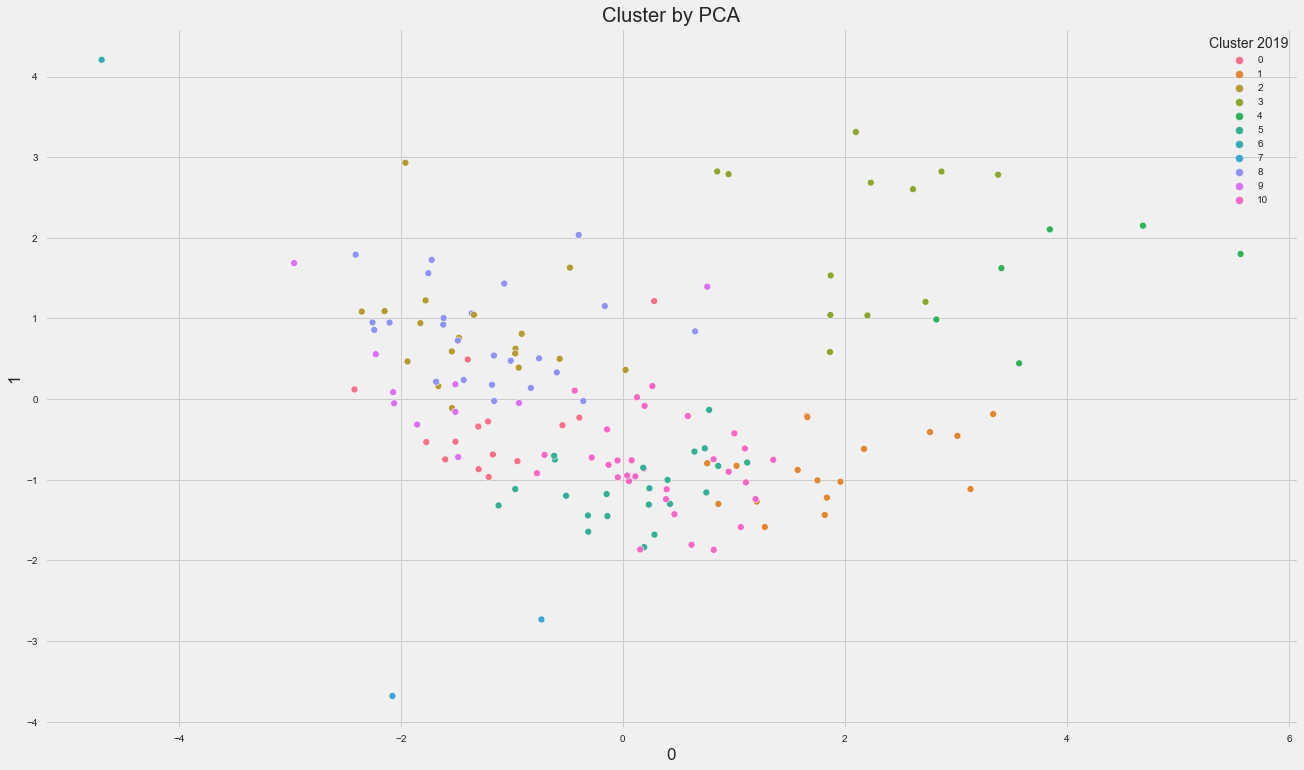

Cluster 2019,0,1,2,3,4,5,6,7,8,9,10
Debt to equity,-0.116130,-0.635158,1.251831,-0.244962,-0.636429,-0.597265,0.049838,-0.492415,-0.240158,2.453405,-0.259574
Dividend yield,-0.427518,0.383072,0.326452,-0.506314,0.921285,-0.724583,-1.220113,-0.344087,-0.855102,0.064726,1.028041
EV/EBITDA,-0.748928,-0.665598,0.999857,0.355756,-0.328396,-0.748928,3.654685,-1.390439,1.410762,-0.409142,-0.408394
Net profit margin,-0.546092,0.323108,-0.442599,2.175115,2.753877,-0.352209,-0.767491,-1.715078,-0.373836,-0.531402,-0.202357
ROA,-0.796752,1.947111,-0.354821,0.178800,1.304096,0.070894,-1.109779,-2.627053,-0.680388,-0.616421,0.057031
Operating profit margin,-0.528816,0.208990,-0.307401,2.170424,2.714593,-0.452951,-0.914070,-1.525389,-0.311333,-0.401382,-0.243009
Net debt to EBITDA,1.107096,-0.794267,0.770607,-0.144184,-0.782326,-0.649554,6.060841,-2.610585,0.443953,0.623405,-0.415547


In [30]:
#Year 2019
cluster_visualization(df_2019_scale)

- From the line graph, we can see that there are three clusters with very unique characteristics in 2019:
    - Cluster 6 - high net debt to EBITDA ratio and EV/EBITDA ratio
    - Cluster 7 - low and negative ROA, operating profit margin and net debt to EBITDA
    - Cluster 9 - high debt to equity

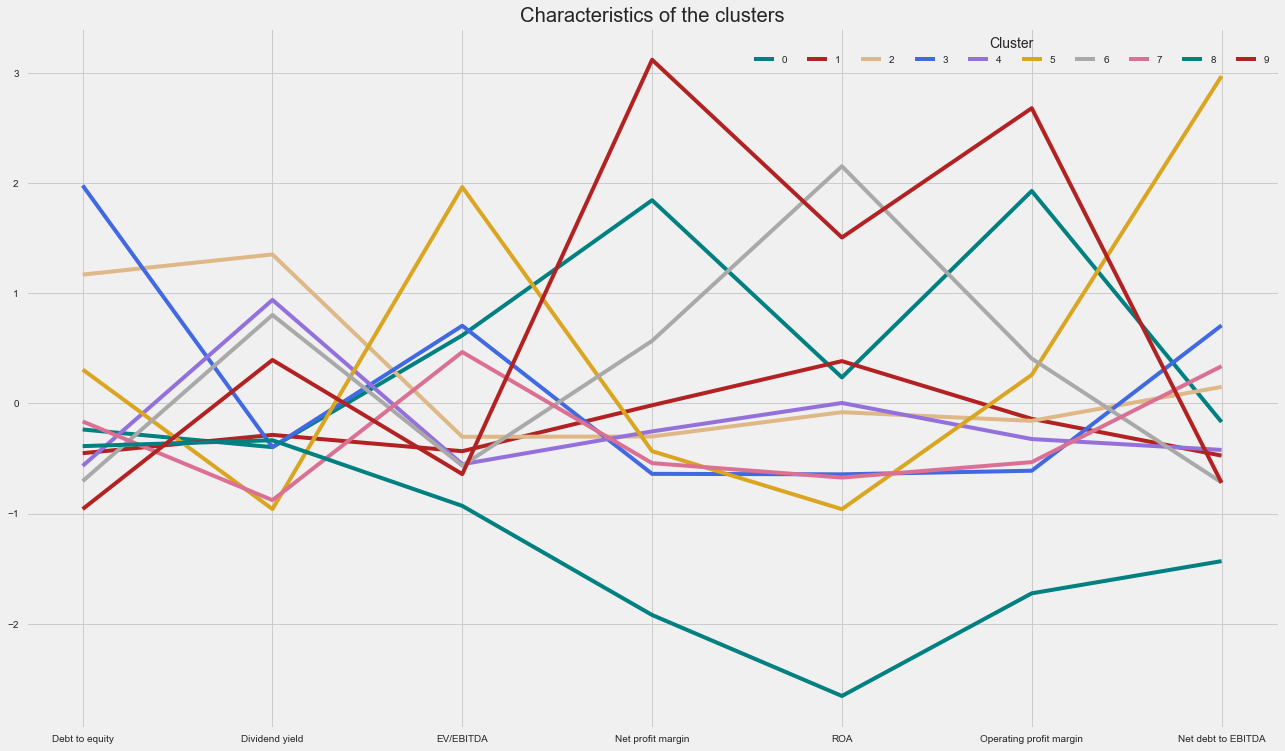

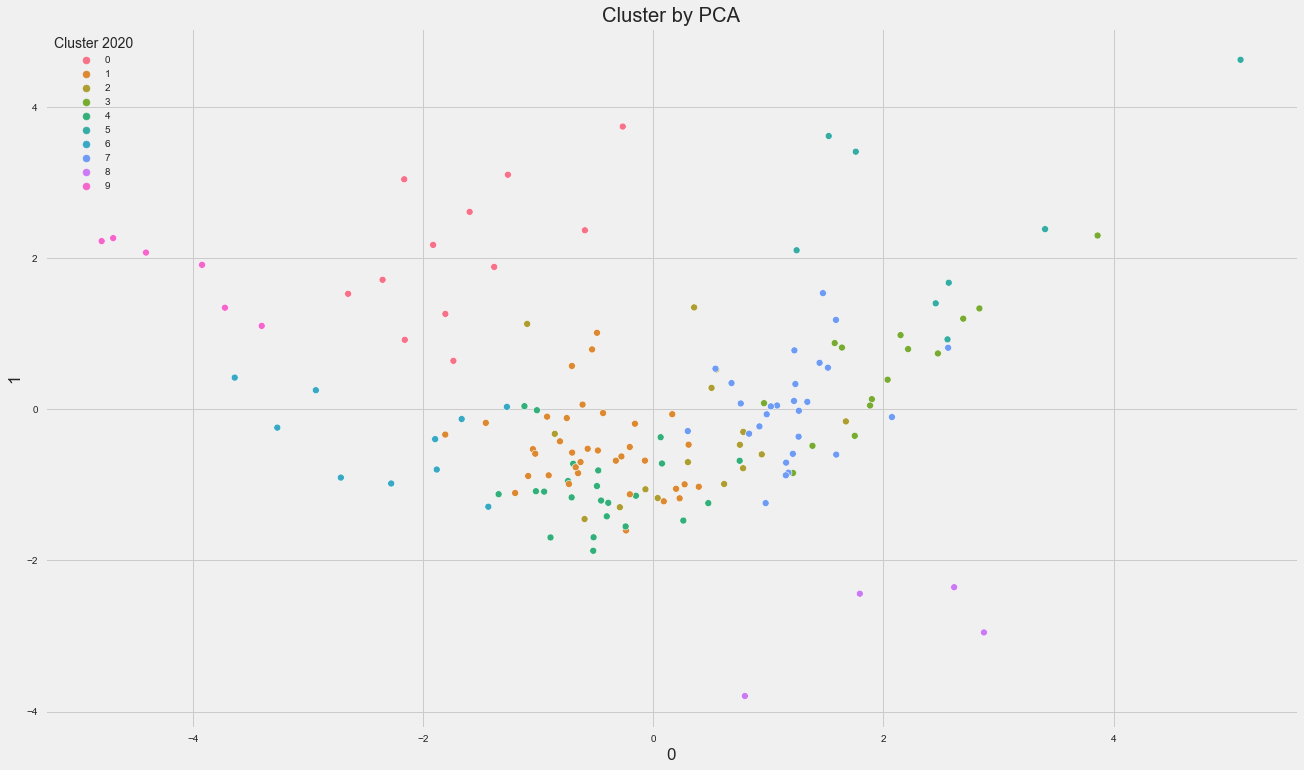

Cluster 2020,0,1,2,3,4,5,6,7,8,9
Debt to equity,-0.235938,-0.451229,1.169381,1.978283,-0.566577,0.308060,-0.704839,-0.162841,-0.386866,-0.958248
Dividend yield,-0.396174,-0.285154,1.352403,-0.396174,0.939695,-0.958217,0.802850,-0.877265,-0.333725,0.394849
EV/EBITDA,0.618052,-0.432977,-0.302565,0.705363,-0.551094,1.963758,-0.564662,0.466830,-0.929141,-0.640834
Net profit margin,1.844491,-0.016135,-0.299524,-0.638542,-0.253352,-0.432570,0.568261,-0.541263,-1.919169,3.118882
ROA,0.236791,0.384463,-0.079197,-0.642856,0.004578,-0.959025,2.152489,-0.672209,-2.654183,1.506039
Operating profit margin,1.928390,-0.139334,-0.157570,-0.610166,-0.322660,0.259424,0.407442,-0.532119,-1.722608,2.679663
Net debt to EBITDA,-0.168163,-0.472923,0.150313,0.708519,-0.421197,2.970493,-0.716088,0.338272,-1.430534,-0.719391


In [31]:
#Year 2020
cluster_visualization(df_2020_scale)

- From the line graph, we can see that there are four clusters with very unique characteristics in 2020:
    - Cluster 5 - high net debt to EBITDA ratio and EV/EBITDA ratio
    - Cluster 8 - low and negative ROA, net profit margin, operating profit margin and net debt to EBITDA
    - Cluster 6 - high ROA
    - Cluster 9 - high net profit margin and operating profit margin

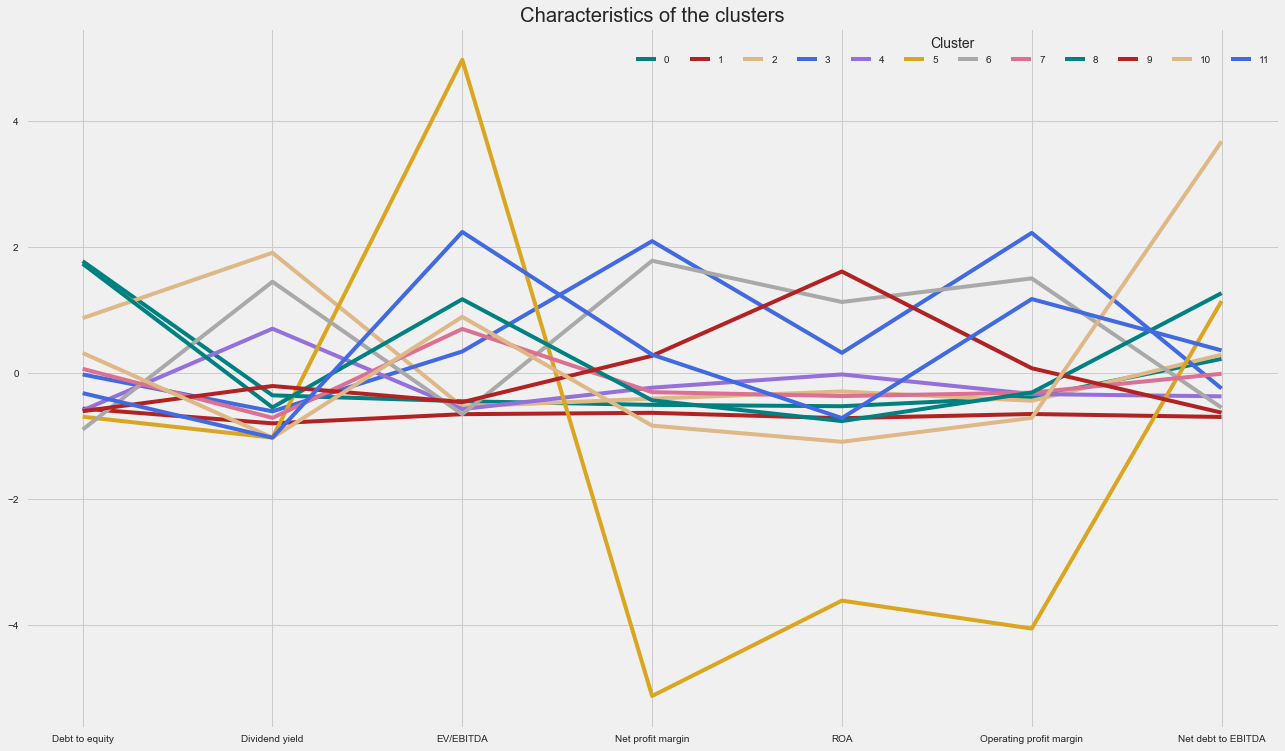

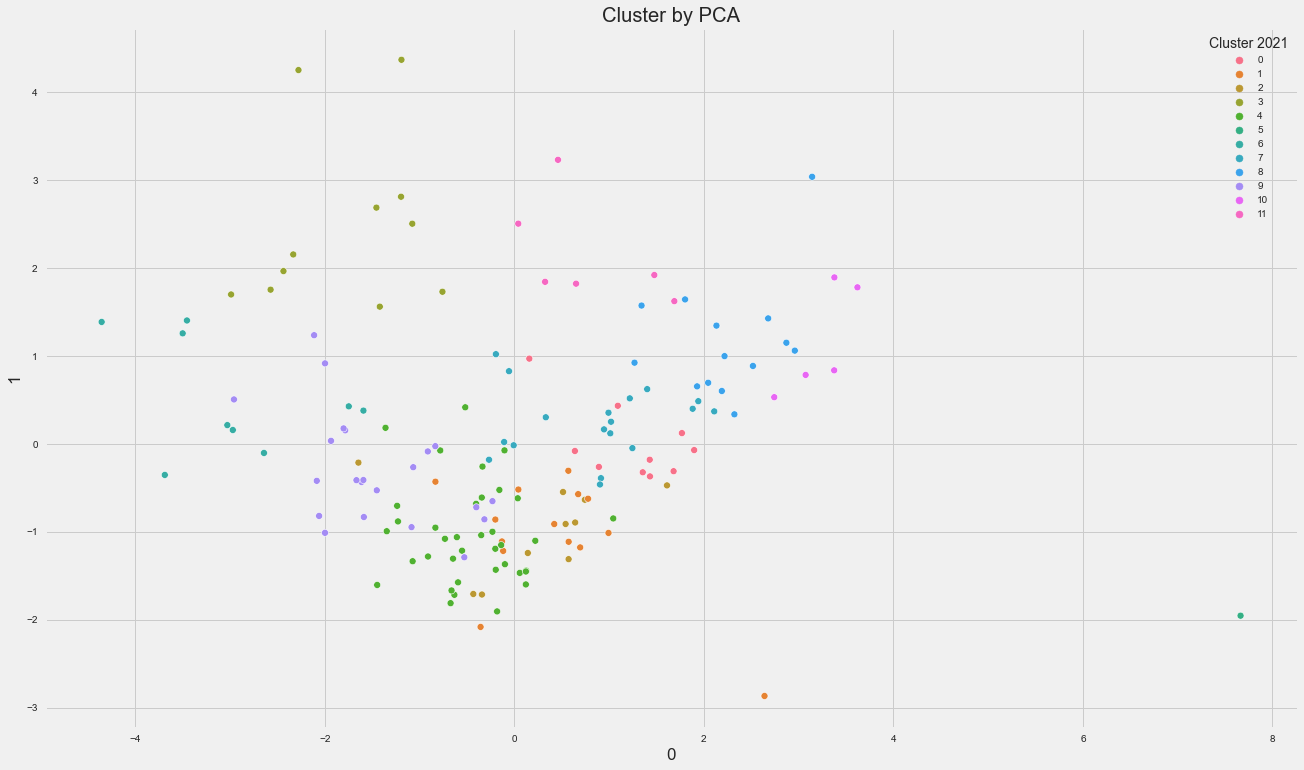

Cluster 2021,0,1,2,3,4,5,6,7,8,9,10,11
Debt to equity,1.778264,-0.560421,0.874825,-0.019404,-0.589083,-0.689564,-0.893044,0.069896,1.736809,-0.601761,0.321650,-0.315248
Dividend yield,-0.350464,-0.794726,1.911234,-0.604263,0.706842,-1.021906,1.451827,-0.707781,-0.542305,-0.202683,-1.021906,-1.021906
EV/EBITDA,-0.443689,-0.649223,-0.527832,0.345404,-0.568567,4.972685,-0.649223,0.702745,1.174206,-0.459008,0.894754,2.241387
Net profit margin,-0.501920,-0.627946,-0.402622,2.095572,-0.228876,-5.119560,1.784648,-0.299577,-0.429470,0.277286,-0.830881,0.295100
ROA,-0.523086,-0.713473,-0.288857,0.323617,-0.018453,-3.606935,1.130226,-0.361638,-0.758861,1.613752,-1.087197,-0.711179
Operating profit margin,-0.381072,-0.646446,-0.436508,2.226952,-0.329932,-4.050051,1.504700,-0.307715,-0.306635,0.079631,-0.707774,1.177262
Net debt to EBITDA,0.228183,-0.693367,0.294631,-0.241410,-0.366249,1.145215,-0.546374,-0.007988,1.270742,-0.625056,3.677442,0.362544


In [32]:
#Year 2021
cluster_visualization(df_2021_scale)

- From the line graph, we can see that there are two clusters with very unique characteristics in 2021:
    - Cluster 5 - high EV/EBITDA ratio and low-negative net profit margin, operating profit margin and ROA
    - Cluster 10 - high net debt to EBITDA

I am not going to investigate the details of the companies’ performance and just want to show you all that among the financial indicators selected, clustering can help us to group stocks with similar characteristics together, but also can detect some outliners.

#### Stock clusters performance

After conducting cluster analysis, a criteria is needed to help making decision on portfolio construction. In this experiment, I will use Return to price volatility ratio to measure the stock clusters performance. Returns would be the one year return, calculated by comparing the price at year-end with the price at the beginning year. Price volatility is the standard deviation of the price throughout the whole year. So returns-to-price volatility ratio is simply a measure of returns and risks, and also used to mimic the Sharpe ratio. In each year, I will select top 3 clusters with highest returns-to-price volatility ratio to construct portfolio, and this portfolio will be compared with the another portfolio by selecting corresponding number of individual stocks with highest returns-to-price volatility ratio in this year, without applying cluster analysis in advance.

In [33]:
#Create a function to show the stock clusters performance
def cluster_performance(data):
    performance_df = data.groupby(data.columns[-1]).mean()
    performance_df['Return to volatility'] = performance_df['Return'] / performance_df['Volatility']
    performance_df.insert(column='Number of stocks',value=[len(data[data[data.columns[-1]]==cluster]) 
                                                           for cluster in performance_df.index],loc=0)
    performance_df = performance_df.sort_values('Return to volatility',ascending=False)

    return performance_df

In [34]:
#Year 2015
cluster_performance(df_2015)

,Number of stocks,Debt to equity,Dividend yield,EV/EBITDA,Net profit margin,ROA,Operating profit margin,Net debt to EBITDA,Return,Volatility,Return to volatility
Cluster 2015,,,,,,,,,,,
5,21,153.761905,0.040000,7.126190,4.900952,4.876667,8.328095,566.201429,22.774762,0.799048,28.502384
7,10,11.063000,0.113000,3.803000,12.671000,19.833000,15.839000,-9.819000,47.768000,1.978000,24.149646
0,10,6.085000,0.085000,3.720000,19.127000,9.941000,22.385000,157.389000,26.883000,1.277000,21.051684
2,7,53.548571,0.021429,18.847143,2.570000,1.638571,5.552857,1053.231429,13.838571,0.921429,15.018605
1,31,51.744839,0.069355,5.190323,5.862581,6.688387,8.517742,305.168387,19.361290,1.328387,14.575036
6,10,34.305000,0.052000,5.627000,35.554000,12.594000,45.401000,203.864000,16.294000,1.509000,10.797879
11,24,23.093333,0.038333,5.447083,9.086250,11.557917,11.903333,114.017917,18.119583,1.854167,9.772360
8,22,41.874091,0.004545,6.408182,4.980455,3.540909,8.673182,500.021818,3.266364,1.039545,3.142108
9,1,121.080000,0.000000,26.630000,38.690000,2.290000,50.210000,2578.870000,0.540000,0.440000,1.227273


- From the table above, in the year 2015, cluster 5, 7 and 0 will be chosen due to their relatively high returns-to-price volatility ratio. Portfolio A is constructed with equal weighted investments onto all stocks in these three clusters, and there are 41 stocks in total.

In [35]:
#Year 2016
cluster_performance(df_2016)

,Number of stocks,Debt to equity,Dividend yield,EV/EBITDA,Net profit margin,ROA,Operating profit margin,Net debt to EBITDA,Return,Volatility,Return to volatility
Cluster 2016,,,,,,,,,,,
8,17,123.561176,0.022353,6.712353,5.507647,7.252941,9.004706,529.567059,37.942353,2.112941,17.957127
0,19,134.380526,0.113684,6.483684,5.301579,5.162105,8.230526,595.576842,26.980526,1.507368,17.899092
9,3,5.003333,0.090000,6.173333,32.610000,26.116667,38.426667,65.870000,62.570000,4.016667,15.577593
1,17,34.220000,0.048824,5.080000,12.017059,17.134706,15.380588,92.845882,56.237647,4.378824,12.843095
4,39,28.480000,0.035128,5.844872,8.433590,7.140769,11.486667,217.912564,23.854615,2.245385,10.623844
3,21,50.539048,0.008095,9.272381,3.117619,2.015238,6.264762,804.572381,11.471429,1.187619,9.659182
5,14,22.956429,0.046429,4.975000,29.774286,9.685000,39.574286,195.979286,10.864286,1.685000,6.447647
10,18,16.737778,0.116667,4.097222,8.538889,8.103889,11.136111,114.346111,6.108333,1.185000,5.154712
2,6,99.276667,0.046667,13.548333,6.628333,1.553333,10.520000,2543.906667,-4.110000,0.810000,-5.074074


- From the table above, in the year 2016, cluster 8, 0 and 9 will be chosen due to their relatively high returns-to-price volatility ratio. Portfolio A is constructed with equal weighted investments onto all stocks in these three clusters, and there are 39 stocks in total.

In [36]:
#Year 2017
cluster_performance(df_2017)

,Number of stocks,Debt to equity,Dividend yield,EV/EBITDA,Net profit margin,ROA,Operating profit margin,Net debt to EBITDA,Return,Volatility,Return to volatility
Cluster 2017,,,,,,,,,,,
8,3,176.106667,0.096667,2.713333,16.926667,3.016667,32.910000,1428.346667,21.613333,0.726667,29.743119
5,13,24.264615,0.041538,2.686923,33.856154,8.923077,44.163077,327.224615,45.765385,1.680000,27.241300
1,20,98.726000,0.086000,1.738500,4.622500,6.006000,7.123000,442.737500,24.857500,1.292000,19.239551
4,13,70.593846,0.029231,0.555385,2.786923,2.167692,5.256923,967.576154,20.303846,1.120769,18.115992
11,12,178.397500,0.059167,6.413333,3.551667,5.156667,6.122500,708.828333,32.589167,1.848333,17.631650
3,15,63.970667,0.014000,9.346000,6.329333,3.710000,10.926667,741.314000,32.034667,2.144000,14.941542
0,21,36.741429,0.031905,4.403810,11.352857,7.982381,15.327143,223.956190,29.039524,2.441429,11.894480
2,19,20.235789,0.051053,0.843684,13.047895,16.717368,16.538947,78.227368,32.070000,3.205263,10.005419
9,23,22.269565,0.092609,0.510435,6.616522,6.673043,9.097826,205.297391,3.516087,1.325217,2.653215


- From the table above, in the year 2017, cluster 8, 5 and 1 will be chosen due to their relatively high returns-to-price volatility ratio. Portfolio A is constructed with equal weighted investments onto all stocks in these three clusters, and there are 36 stocks in total.

In [37]:
#Year 2018
cluster_performance(df_2018)

,Number of stocks,Debt to equity,Dividend yield,EV/EBITDA,Net profit margin,ROA,Operating profit margin,Net debt to EBITDA,Return,Volatility,Return to volatility
Cluster 2018,,,,,,,,,,,
1,11,46.109091,0.030909,0.000000,2.439091,2.063636,4.618182,722.437273,12.610909,0.929091,13.573386
9,9,108.103333,0.062222,0.000000,4.760000,2.126667,7.473333,1275.732222,10.856667,1.210000,8.972452
11,15,49.843333,0.150000,0.089333,5.252667,6.233333,7.726667,356.412000,5.284667,0.787333,6.712108
8,16,18.626250,0.083750,0.211875,11.960000,17.623750,14.872500,72.007500,4.580625,3.163125,1.448133
6,26,25.428077,0.052692,0.251154,5.720385,6.573846,7.732692,163.230385,0.587692,1.608077,0.365463
2,10,38.110000,0.031000,4.227000,30.233000,8.579000,40.376000,402.417000,-0.249000,1.682000,-0.148038
10,10,127.718000,0.079000,10.976000,4.939000,2.708000,10.273000,1266.177000,-1.125000,1.169000,-0.962361
7,5,9.890000,0.134000,1.554000,41.172000,12.402000,49.570000,140.436000,-7.386000,2.432000,-3.037007
5,21,50.166190,0.021429,7.560000,5.678571,3.804286,9.554286,518.054286,-6.923333,1.803333,-3.839187


- From the table above, in the year 2018, cluster 1, 9 and 11 will be chosen due to their relatively high returns-to-price volatility ratio. Portfolio A is constructed with equal weighted investments onto all stocks in these three clusters, and there are 35 stocks in total.

In [38]:
#Year 2019
cluster_performance(df_2019)

,Number of stocks,Debt to equity,Dividend yield,EV/EBITDA,Net profit margin,ROA,Operating profit margin,Net debt to EBITDA,Return,Volatility,Return to volatility
Cluster 2019,,,,,,,,,,,
2,18,119.938333,0.079444,6.937778,4.738333,4.416111,9.143333,746.179444,18.540556,1.683889,11.010558
10,31,38.271290,0.115484,1.350968,7.044194,6.530645,9.928065,257.312903,9.075484,1.029677,8.813910
4,6,17.908333,0.110000,1.668333,35.418333,12.933333,45.971667,106.146667,10.548333,1.431667,7.367870
3,12,39.060833,0.036667,4.382500,29.863333,7.155833,39.340000,369.153333,13.218333,2.241667,5.896654
5,22,20.024545,0.025455,0.000000,5.605909,6.601818,7.369545,160.868182,9.045909,2.002727,4.516795
9,10,184.864000,0.066000,1.348000,3.886000,3.073000,7.998000,685.511000,1.940000,1.026000,1.890838
1,17,17.977059,0.082353,0.330588,12.087647,16.234706,15.436471,101.225294,4.687647,2.643529,1.773253
8,24,39.320417,0.018750,8.567917,5.398333,2.744583,9.095417,611.550833,1.658333,1.423750,1.164764
0,14,46.022143,0.040714,0.000000,3.745000,2.147143,6.445000,884.861429,-2.002143,1.482857,-1.350193


- From the table above, in the year 2019, cluster 2, 10 and 4 will be chosen due to their relatively high returns-to-price volatility ratio. Portfolio A is constructed with equal weighted investments onto all stocks in these three clusters, and there are 55 stocks in total.

In [39]:
#Year 2020
cluster_performance(df_2020)

,Number of stocks,Debt to equity,Dividend yield,EV/EBITDA,Net profit margin,ROA,Operating profit margin,Net debt to EBITDA,Return,Volatility,Return to volatility
Cluster 2020,,,,,,,,,,,
8,4,31.600000,0.032500,-1.760000,-11.927500,-8.977500,-9.862500,-356.550000,35.145000,1.027500,34.204380
5,8,67.890000,0.007500,15.900000,4.246250,0.352500,16.865000,2308.928750,36.752500,1.077500,34.109049
3,15,155.111333,0.030000,8.218000,2.005333,2.092667,5.138667,938.966000,39.428000,1.491333,26.438087
9,6,1.761667,0.061667,0.000000,42.885000,13.920000,49.501667,74.153333,47.771667,2.451667,19.485384
0,12,39.481667,0.030000,7.685000,29.020000,6.934167,39.370833,408.004167,69.303333,4.225833,16.399921
7,27,43.298889,0.010741,6.761852,3.063704,1.931111,6.191111,714.726296,27.506296,1.744444,15.767941
2,16,112.869375,0.100000,2.065000,5.693750,5.195000,11.241875,600.888750,32.176875,2.056875,15.643573
6,10,14.995000,0.078000,0.465000,15.135000,17.478000,18.861000,76.154000,54.993000,4.257000,12.918252
1,36,28.238889,0.034444,1.268889,8.776944,7.746944,11.487778,223.426667,38.679722,3.484444,11.100686


- From the table above, in the year 2020, cluster 8, 5 and 3 will be chosen due to their relatively high returns-to-price volatility ratio. Portfolio A is constructed with equal weighted investments onto all stocks in these three clusters, and there are 27 stocks in total.

In [40]:
#Year 2021
cluster_performance(df_2021)

,Number of stocks,Debt to equity,Dividend yield,EV/EBITDA,Net profit margin,ROA,Operating profit margin,Net debt to EBITDA,Return,Volatility,Return to volatility
Cluster 2021,,,,,,,,,,,
10,5,71.570000,0.000000,13.762000,-0.870000,-0.140000,3.172000,2883.938000,119.510000,2.110000,56.639810
11,6,36.343333,0.000000,25.765000,13.916667,2.085000,35.033333,741.441667,118.865000,3.460000,34.354046
8,14,149.842143,0.013571,16.252857,4.401429,1.802857,9.952143,1328.431429,96.679286,3.249286,29.754012
0,10,152.135000,0.019000,1.832000,3.450000,3.198000,8.694000,654.601000,90.374000,3.179000,28.428437
1,14,22.782857,0.006429,0.000000,1.795000,2.071429,4.208571,58.981429,78.292857,2.876429,27.218773
7,18,57.645556,0.008889,12.050556,6.107222,4.153333,9.933889,501.957778,88.106111,5.363889,16.425790
2,10,102.166000,0.083000,1.082000,4.754000,4.584000,7.757000,697.548000,37.718000,2.563000,14.716348
3,11,52.706364,0.011818,8.865455,37.560909,8.208182,52.775455,351.091818,81.042727,6.432727,12.598502
4,37,21.197568,0.048919,0.718919,7.035676,6.184054,9.558378,270.405676,37.439459,3.172162,11.802505


- From the table above, in the year 2021, cluster 10, 11 and 8 will be chosen due to their relatively high returns-to-price volatility ratio. Portfolio A is constructed with equal weighted investments onto all stocks in these three clusters, and there are 25 stocks in total.

#### Construct a portfolio based on clustering result, and compare with the portfolio constructed without help of clustering

- Considering two portfolios: Portfolios A with top 3 clusters with highest returns-to-price volatility ratio and Portfolios B with top stocks with highest returns-to-price volatility ratio.

In [41]:
#Ceate a function to calculate the return of portfolio A and portfolio B after 1 year
def portfolios_performance(year_target,year_base):
    year_target_clustered_year_base = year_target.copy()
    year_target_clustered_year_base['Cluster before'] = year_base[year_base.columns[-1]]

    year_target_clustered_year_base_performance = year_target_clustered_year_base.groupby('Cluster before').mean()
    year_target_clustered_year_base_performance['Return to volatility'] = year_target_clustered_year_base_performance['Return']/year_target_clustered_year_base_performance['Volatility']
    year_target_clustered_year_base_performance['Number of stocks'] = [len(year_base[year_base[year_base.columns[-1]]==cluster]) for cluster in year_target_clustered_year_base_performance.index]
        
    year_base_individual_performance = year_base.copy()
    year_base_individual_performance['Return to volatility'] = year_base_individual_performance['Return'] / year_base_individual_performance['Volatility']
    year_base_individual_performance.sort_values('Return to volatility',inplace=True,ascending=False)

    year_base_clustered_year_base = cluster_performance(year_base)
    year_base_clustered_year_base = year_base_clustered_year_base.loc[:, ['Return', 'Volatility', 'Return to volatility', 'Number of stocks']]
    year_base_clustered_year_base.sort_values("Return to volatility", inplace = True, ascending=False)
    
    number_individual_selected_stocks = year_base_clustered_year_base[:3]['Number of stocks'].sum()
    selected_cluster_year_base_indices = year_base_clustered_year_base[:3].index
    
    performance_portfolio_A = year_target_clustered_year_base_performance.loc[selected_cluster_year_base_indices]
    return_portfolio_A = np.round(performance_portfolio_A['Return'].dot(performance_portfolio_A['Number of stocks']) / performance_portfolio_A['Number of stocks'].sum(),2)
    
    stocks_portfolio_B = year_base_individual_performance[:number_individual_selected_stocks].index
    return_portfolio_B = np.round(year_target_clustered_year_base.loc[stocks_portfolio_B]['Return'].mean(),2)


    return return_portfolio_A, return_portfolio_B, number_individual_selected_stocks

In [42]:
#Create a dataframe for comparison the return between portfolio A and portfolio B through the years
year_target = [df_2021,df_2020,df_2019,df_2018,df_2017,df_2016]
year_base = [df_2020,df_2019,df_2018,df_2017,df_2016,df_2015]
return_portfolio_A = []
return_portfolio_B = []
number_of_stocks = []
year = ['Year 2021','Year 2020','Year 2019','Year 2018','Year 2017','Year 2016']
for i in range(len(year_target)):
    performance = portfolios_performance(year_target[i], year_base[i])
    return_portfolio_A.append(performance[0])
    return_portfolio_B.append(performance[1])
    number_of_stocks.append(performance[2])
portfolios_performance_comparison = pd.DataFrame(
    {
        'Number of stocks':number_of_stocks,
        'Return of portfolio A (%)':return_portfolio_A,
        'Return of portfolio B (%)':return_portfolio_B
    },
    index=year
).sort_index()

In [43]:
portfolios_performance_comparison

,Number of stocks,Return of portfolio A (%),Return of portfolio B (%)
Year 2016,41,29.47,33.25
Year 2017,39,26.35,25.44
Year 2018,36,8.44,8.11
Year 2019,35,4.79,0.83
Year 2020,55,35.81,44.28
Year 2021,27,116.37,112.46


- The table above shows that portfolio A has consistently generated higher returns than portfolio B in 4/6 years from 2016 to 2021 

It can't be concluded that portfolio construction through cluster analysis of financial indicators would always give a superior performance. But its consistently better performance over stock selection by only considering returns and risks shows that fundamental analysis really adds some value, and cluster analysis has helped to simplify the analysis process. Below are some possible explanations for the better performance of portfolio A:
- Value of fundamental analysis —Financial indicators measure a company’s performance from different dimensions. So returns of a company with good financial performance should be more sustainable than returns “randomly generated”. Taking consideration of financial indicators periodically and updating portfolio allocation are quite necessary for its sustainable performance.
- Diversification benefits — Cluster analysis helps to distinguish stocks with different characteristics. In other words, the three clusters chosen should be quite different fundamentally. Such diversification prevents the portfolio suffering greatly from downturn of a specific type of companies during a period.
- Prevent some company specific risks — Clustering groups stocks with similar characteristics together. So a group with high returns-to-price volatility ratio in the past should be more “concrete” than a single stock with high ratio. Portfolio construction through this method may have prevented some company specific risks.

#### Recommendation for constructing portfolio to buy in the year 2021

In [44]:
df_2021[df_2021['Cluster 2021'].isin(cluster_performance(df_2021).head(3).index)][['Company']]

,Company
0,ACC Binh Duong Investment and Construction JSC
1,An Pha Petrol Joint Stock Company
8,Ben Tre Pharmaceutical JSC
16,Binh Duong Trade And Development JSC
23,Chuong Duong Joint Stock Company
46,FECON CORPORATION
48,FLC Group JSC
59,Hoa Binh Construction Group Joint Stock Company
63,I.D.I International Development & Investment Corporation
70,Kinh Bac City Development Holding Corporation


- In this list, there are some popular stocks such as FLC Group JSC, Hoa Binh Construction Group Joint Stock Company, SAM Holdings Corporation...

#### Conclusion

It's always not easy to construct a portfolio with consistently good performance, especially when there are thousands of stocks. Sometimes we may first scale down the scope, but still have to look at hundreds of financial indicators before making the decision.